In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# generate random data-set
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X + (np.random.rand(100, 1)-0.5)

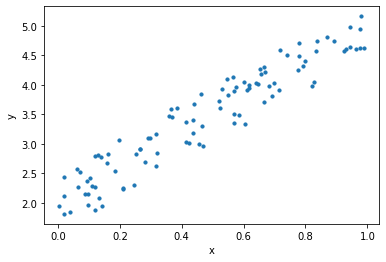

'\nKeep in mind that this algorithm usually works with more dimension\n'

In [2]:
# Visualize the dataset
plt.scatter(X,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

'''
Keep in mind that this algorithm usually works with more dimension
'''

Train the model

In [3]:
# Add a column of ones to X (interception data)
X = np.c_[np.ones((X.shape[0], 1)), X]              # Watch out for changing the shape of X, don't run this cell twice


# Store number of features (n_feature)
n_feautres = X.shape[1]

In [4]:
# Initialize a list to store losses during training
losses = []

# Initialize weights
weights = np.zeros((n_feautres,1))

In [5]:
# Set learning rate to 0.00005 (lr)
lr = 0.00005

# Set number of epochs to 100 (n_iterations)
n_iterations = 100

In [47]:
'''
Run the gradient descent algorithm
'''
for _ in range(n_iterations):
    '''
    Calculate residuals
    '''
    # Predict the output
    y_pred = np.dot(X, weights)

    # Calculate the residuals (residuals = y_pred - y)
    residuals = y_pred - y

    '''
    Calculate gradient
    '''
    gradient_vector = np.dot(X.T, residuals)


    # Store loss (summ of residuals squared)
    losses.append(np.sum((residuals ** 2)))

    # Update the weights
    weights -= lr * gradient_vector


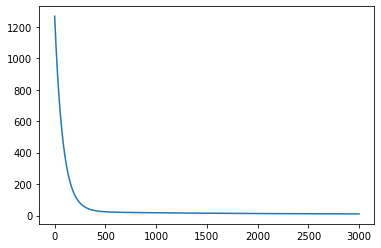

In [48]:
# Show losses
plt.plot(losses)

Evaluate the model

In [49]:
# Predict the y for all X values
y_pred = np.dot(X, weights)


'''
Implement mean squared error function:
Given y and y_pred
Calculate the squared differences between y and y_pred
Return the mean of the squared differences
'''
def mean_squared_error(y, y_pred):
    # One line solution
    mse = np.sum((y - y_pred) ** 2) / len(y)
    # Loop solution

    mse = 0
    for i in range(len(y)):
        #mse += (y[i] - y_pred[i]) ** 2
        mse += (y[i] - y_pred[i])*(y[i] - y_pred[i])
    mse /= len(y)
    return mse

# Calculate the mean squared error
mean_squared_error(y, y_pred)


array([0.10181582])

Visualize the model

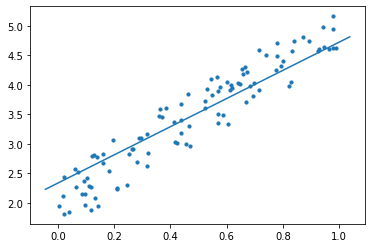

In [50]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals)

plt.scatter(X[:,1:],y,s=10)
abline(slope=weights[1], intercept=weights[0])

Compare our mean_squared_error to sklearn

In [56]:
from sklearn.metrics import mean_squared_error as mse_sklearn
mse_sklearn(y, y_pred)

0.07623324582875007

Use the model to predict an example value

In [52]:
test_value = 0.5
print(np.dot([1,test_value], weights))
print(test_value * weights[1] + weights[0])

[3.53008788]
[3.53008788]


OOP Aproach

In [53]:
# import linear model class
from linear_regression import LinearRegression

# Change jupyter settings to reload dependencies on change
%load_ext autoreload
%autoreload 2

In [55]:
# Initialize a LinearRegression object
regression = LinearRegression()

# Fit the model
regression.fit(X, y)

# Predict the y for all X values
y_pred = regression.predict(X)

# Evaluate the model
mean_squared_error(y, y_pred)

array([0.07623325])